# Сравнение временных рядов

Сравнить временные ряды (варианты по методам и наборам данных) с эталонным сигналом и идентифицировать состояние (ЭКГ, работа мотора автомобиля, идентификация состояния оборудования).

**Корреляция** — статистическая взаимосвязь двух или более величин. При этом изменения значений одной или нескольких из этих величин сопутствуют систематическому изменению значений другой или других величин.

Математической мерой корреляции двух величин служит *корреляционный коэффициент*.

Важной характеристикой совместного распределения двух случайных величин является *ковариация* (или корреляционный момент). Ковариация определяется как математическое ожидание произведения отклонений случайных величин:

$cov(X, Y) = \sigma_{X,Y} = E[(X−E[X])(Y−E[Y])]=E[XY]-E[X]E[Y]$, где $E$ - это математическое ожидание.

Если ковариация положительна, то с ростом значений одной случайной величины значения второй имеют тенденцию возрастать, а если знак отрицательный — то убывать.

Однако только по абсолютному значению ковариации нельзя судить о том, насколько сильно величины взаимосвязаны, т. к. ее масштаб зависит от их дисперсий.
Масштаб можно отнормировать, поделив значение ковариации на произведение среднеквадратических отклонений (квадратных корней из дисперсий). При этом получается так называемый линейный коэффициент корреляции, или **корреляционный коэффициент Пирсона (Брависа — Пирсона)**, который оценивает корреляцию между наборами данных, заданными парами значений $(x_i, y_i) и (\tilde{x_i}, \tilde{y_i})$, при $i =1, ..., n$ :

$ r = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$, где $\sigma $ - среднеквадратическое отклонение.

Получаемое значение будет лежать в диапазоне $-1 \leq r \leq 1$:  $r > 0$ — позитивная корреляция; $r < 0$ — негативная корреляция; $r = 0$ — отсутствие корреляции;

$| r |< 0,5$ — слабая корреляция; $0,5 ≤| r |≤ 0,8$ — средняя корреляция; $0,8 <| r |$ — сильная корреляция.

Но будьте аккуратны с интерпретацией результатов! 

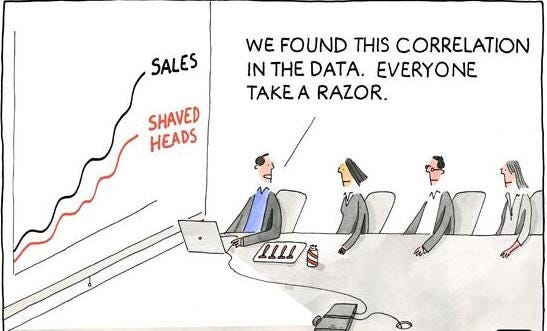

##### Другие корреляционные коэффициенты

**Коэффициент корреляции Спирмена (Spearman rank correlation coefficient)** — мера линейной связи между случайными величинами. Корреляция Спирмена является ранговой, то есть для оценки силы связи используются не численные значения, а соответствующие им ранги. Коэффициент инвариантен по отношению к любому монотонному преобразованию шкалы измерения.

Коэффициент считается по следующей формуле:

$\rho = 1 - \frac{6}{n(n-1)(n+1)\sum{i=1}^N (R_i - S_i)^2}$, где $R_i$ - ранг наблюдения $x_i$ в ряду $X$, $S_i$ ранг наблюдения $y_i$ в ряду $Y$.

Коэффициент $\rho$ принимает значения из отрезка $[-1;1]$. Равенство $\rho=1$ указывает на строгую прямую линейную зависимость, $\rho=-1$ на обратную.

**Коэффициент корреляции Кенделла (Kendall tau rank correlation coefficient)** 

Коэффициент корреляции Кенделла вычисляется по формуле:

$\tau=1-\frac{4}{n(n-1)}R$, где $R = \sum_{i=1}^{n-1}\sum_{j=i+1}^n\left[ \left[ x_i\ <\ x_j \right] \neq \left[ y_i\ <\ y_j \right] \right]$ — количество инверсий, образованных величинами $y_i$, расположенными в порядке возрастания соответствующих $x_i$.

Коэффициент $\tau$ принимает значения из отрезка $[-1;1]$. Равенство $\tau=1$ указывает на строгую прямую линейную зависимость, $\tau=-1$ на обратную.

*Использованы материалы http://www.machinelearning.ru/wiki/*

In [16]:
# данные тут https://goo.su/czY7

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Путь к файлам с данными
# b30hz0.txt - не нормативная работа подшипника (сигналы с четырех датчиков вибрации)
data1 = pd.read_csv("C:/Users/Анна/Desktop/ML занятия/HSE ML/HSE ML/DataSets/b30hz0.txt", sep="\t", header=None).drop(columns=[4])
# h30hz0.txt - нормативная работа подшипника (сигналы с четырех датчиков вибрации)
data2 = pd.read_csv("C:/Users/Анна/Desktop/ML занятия/HSE ML/HSE ML/DataSets/h30hz0.txt", sep="\t", header=None).drop(columns=[4])

# Переименование столбцов
data1.columns = ["s1", "s2", "s3", "s4"]
data2.columns = ["s1", "s2", "s3", "s4"]

In [17]:
n1 = 1
n2 = 200

data1_part = data1.loc[n1:n2]
data2_part = data2.loc[n1:n2]

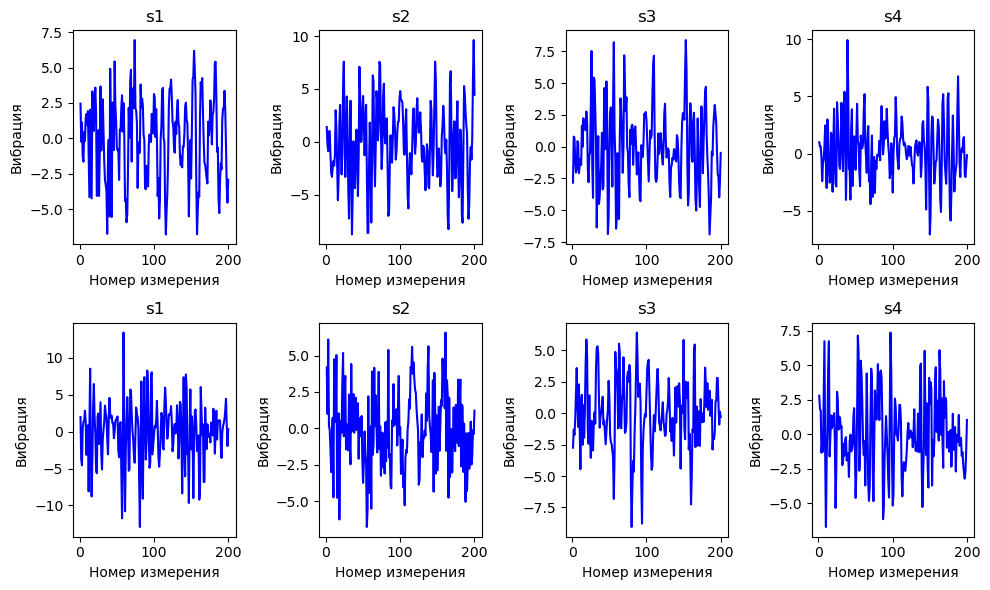

In [18]:
# Построение графиков
plt.figure(figsize=(10, 6))

for i, col in enumerate(data1_part.columns):
    plt.subplot(2, 4, i+1)
    plt.plot(range(n1, n2+1), data1_part[col], color='blue')
    plt.xlabel("Номер измерения")
    plt.ylabel("Вибрация")
    plt.title(f"s{i+1}")

for i, col in enumerate(data2_part.columns):
    plt.subplot(2, 4, i+5)
    plt.plot(range(n1, n2+1), data2_part[col], color='blue')
    plt.xlabel("Номер измерения")
    plt.ylabel("Вибрация")
    plt.title(f"s{i+1}")

plt.tight_layout()


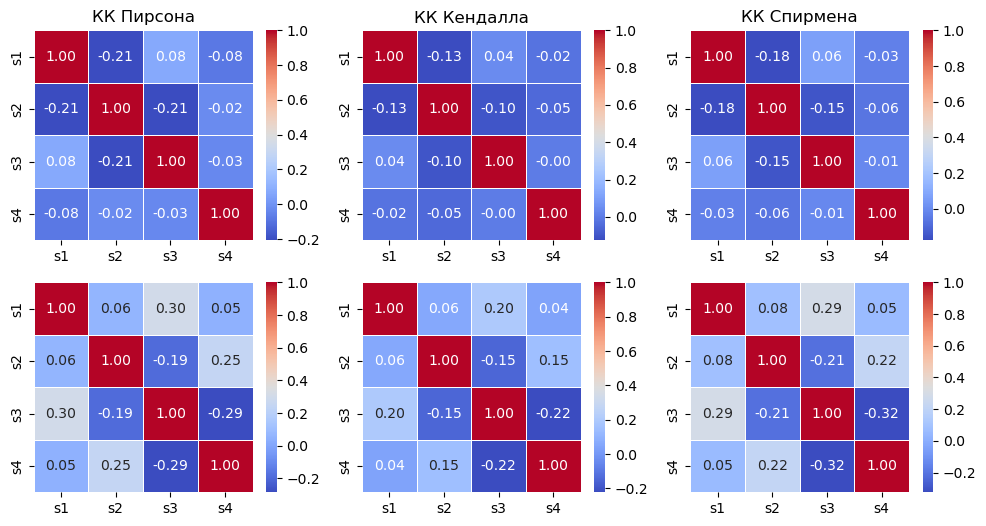

In [19]:
# Расчет коэффициентов корреляции

import seaborn as sns

plt.figure(figsize=(12,6))

corr_pearson = data1_part.corr()
corr_kendall = data1_part.corr(method='kendall')
corr_spearman = data1_part.corr(method='spearman')
plt.subplot(2, 3, 1)
plt.title('КК Пирсона')
sns.heatmap(corr_pearson,cmap='coolwarm',annot=True, fmt=".2f", linewidths=0.5)

plt.subplot(2, 3, 2)
plt.title('КК Кендалла')
sns.heatmap(corr_kendall,cmap='coolwarm',annot=True, fmt=".2f", linewidths=0.5)

plt.subplot(2, 3, 3)
plt.title('КК Спирмена')
sns.heatmap(corr_spearman,cmap='coolwarm',annot=True, fmt=".2f", linewidths=0.5)

corr_pearson_2 = data2_part.corr()
corr_kendall_2 = data2_part.corr(method='kendall')
corr_spearman_2 = data2_part.corr(method='spearman')
plt.subplot(2, 3, 4)
sns.heatmap(corr_pearson_2,cmap='coolwarm',annot=True, fmt=".2f", linewidths=0.5)

plt.subplot(2, 3, 5)
sns.heatmap(corr_kendall_2,cmap='coolwarm',annot=True, fmt=".2f", linewidths=0.5)

plt.subplot(2, 3, 6)
sns.heatmap(corr_spearman_2,cmap='coolwarm',annot=True, fmt=".2f", linewidths=0.5)

plt.show()


### Метод динамической трансформации временной шкалы (евклидово расстояние и $L_p$-норма)

Различие между двумя временными рядами $C = (c_1, c_2, ..., c_n)$ и $Q=(q_1, q_2, ..., q_n)$ длины $n$ может быть определено следующим образом (евклидово расстояние):

$L_2(C, Q) = \sqrt{\sum_{i=1}^N (c_i - q_i)^2}$.

Альтернативным способом определения различия может быть определение $L_p$-нормы(расстояние Минковского):

$L_p(C, Q) = |\sum_{i=1}^N (c_i - q_i)^p|^{\frac{1}{p}}$.

Евклидово расстояние — одна из самых распространенных мер определения отличий между временными рядами, в случае если разница между C и Q обусловлена только гауссовым шумом. Недостатком подхода можно считать, что он не работает
с ненормализованными временными рядами. 

Нормализация позволяет выявить сходство двух временных рядов в некоторых случаях. Однако она остается непригодна для случаев, когда имеется ускорение или замедление времени (несоответствие шагов времени двух временных рядов).

Эта проблема может быть устранена с помощью трансформации временной шкалы. Для того чтобы найти сходство, необходимо трансформировать ось времени для нахождения лучшего подобия.

1. Первый этап алгоритма состоит в следующем. Строим матрицу $d$ порядка $n×m$ (матрицу расстояний), в которой элемент $d_{i,j} есть расстояние $d(q_i, c_i)$ между двумя точками $q_i$ и $c_j$. Обычно используется евклидово расстояние

$d(q_i, c_i) = (q_i - c_j)^2$, или $d(q_i, c_i) = |q_i - c_j|$.

Каждый элемент $(i, j)$ матрицы соответствует выравниванию между точками $q_i$ и $c_j$.

2. На втором этапе строим матрицу трансформаций (деформаций) $D$, каждый элемент которой вычисляется из следующего соотношения:

$D_{i,j} = d_{i,j} + min(D_{i-1,j}, D_{i-1, j-1}, D_{i, j-1})$

3. После заполнения матрицы трансформации переходим к заключительному этапу — построению некоторого оптимального пути трансформации (деформации). Путь трансформации $W$ — это набор смежных элементов матрицы, который устанавливает соответствие между $Q$ и $C$ . Он представляет собой путь, который минимизирует общее расстояние между $Q$ и $C$ . 
k -й элемент пути W определяется как

$w_k = (i,j)_k, d(w_k) = d(q_i, c_i)$

Таким образом, $W = (w_1, w_2, ..., w_k, ..., w_K ); max(m,n) \leq K < m+n$, где $K$ - длин пути.

Путь трансформации должен удовлетворять следующим ограничивающим условиям:

1. Монотонность – путь никогда не возвращается, то есть: оба индекса, $i$ и $j$, которые используются в последовательности, никогда не уменьшаются.

2. Непрерывность – последовательность продвигается постепенно: за один шаг индексы, $i$ и $j$, увеличиваются не более чем на 1.

3. Предельность – последовательность начинается в левом нижнем углу и заканчивается в правом верхнем.

DTW-расстояние (стоимость пути) между двумя последовательностями рассчитывается на основе оптимального пути трансформации с помощью формулы:

$DTW(Q, C) = min(\frac{\sum_{k=1}^K d(w_k)}{K})$

По сути, построение маршрута - классическая задача динамического программирования.

*По материалам Л.А. Мыльников "Статистические методы интеллектуального анализа данных"*

In [20]:
# %pip install dtw-python

In [21]:
data1_part = data1_part.reset_index()
data2_part = data2_part.reset_index()

Distance: 471.20715810000013
Normalized Distance: 1.1780178952500002


<Axes: xlabel='Index', ylabel='Query value'>

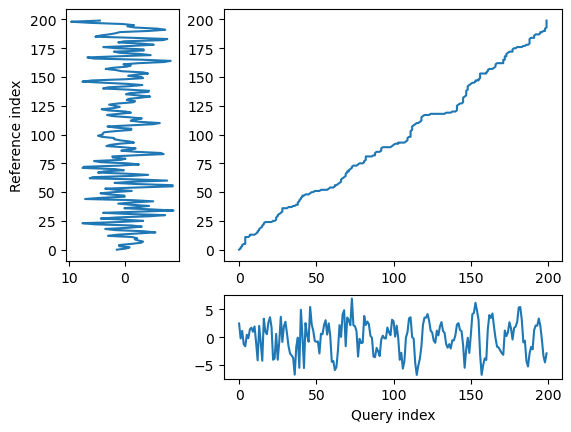

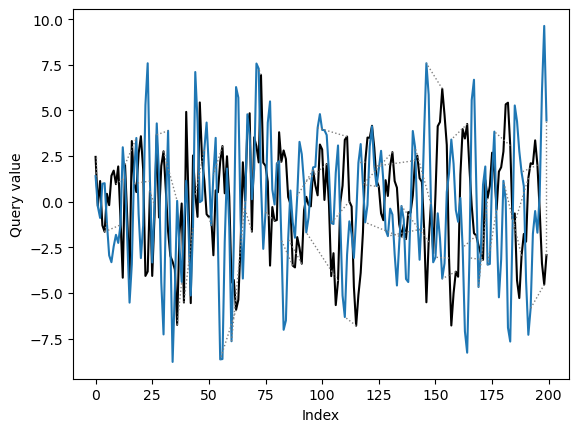

In [22]:
from dtw import *

# Рассчет DTW
alignment = dtw(data1_part['s1'], data1_part['s2'], keep_internals=True)
distance = alignment.distance
normalized_distance = alignment.normalizedDistance

# Вывод результатов
print("Distance:", distance)
print("Normalized Distance:", normalized_distance)

# Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

# Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
alignment.plot(type="twoway")

# See the recursion relation, as formula and diagram
# print(rabinerJuangStepPattern(6,"c"))
# rabinerJuangStepPattern(6,"c").plot()




### Периодограммы

Периодограмма — оценка спектральной плотности мощности (СПМ), основанная на вычислении квадрата модуля преобразования Фурье последовательности данных. (Это нам говорит Википедия...)

С ее помощью можно определять, насколько хорошо выделилась постоянная, сезонная и случайная составляющая, а также делать общие выводы о структуре временного ряда.

Зная тренд или тенденцию ряда, можно делать предсказания на несколько точек вперед и говорить о характере протекающего процесса в сколько-нибудь долгосрочной перспективе. Зная характер сезонной составляющей, можно формулировать различные гипотезы, а также корректировать прогноз в зависимости от характера сезонности. Случайную величину можно исследовать, чтобы понять, насколько исследуемый процесс подвержен случайным влияниям, и постараться исключить эту случайную часть при построении аппроксимации или прогноза. 

С помощью анализа периодограммы ряда можно установить присутствие или отсутствие той или иной составляющей, а также ее характер и относительную величину. Сама периодограмма — это функция от частоты, которая показывает оценку спектральной плотности сигнала.

*Подробнее можно почитать здесь https://habr.com/ru/articles/505738/*

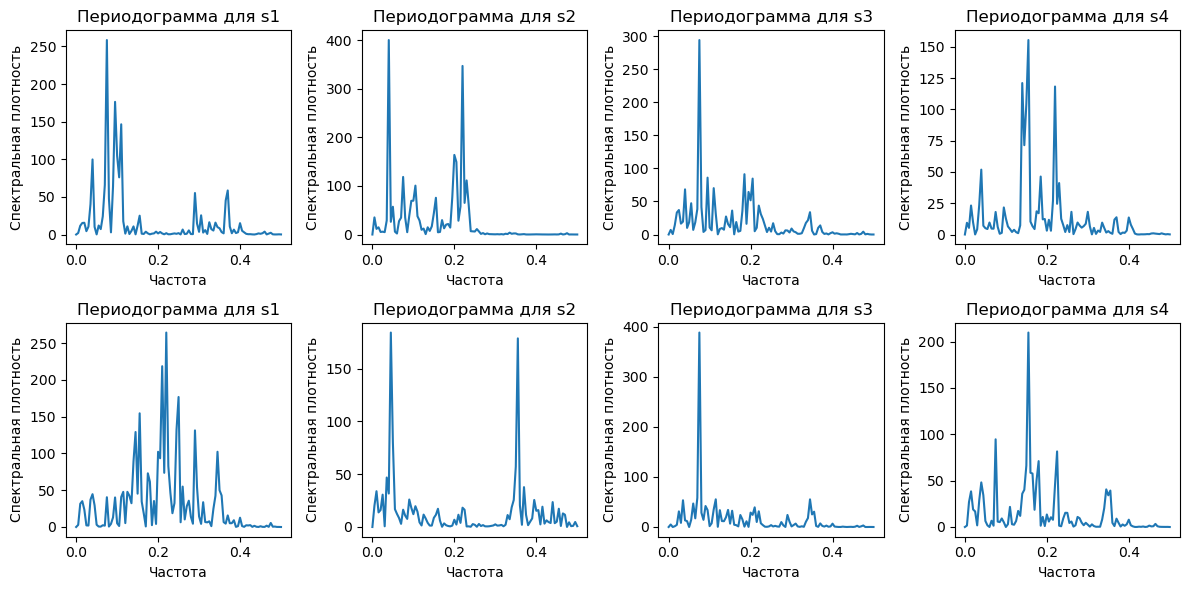

In [25]:
# Периодограммы

from scipy.signal import periodogram

plt.figure(figsize=(12, 6))

def plot_periodogram(data, i, label):
    f, Pxx = periodogram(data)
    plt.subplot(2, 4, i+1)
    plt.plot(f, Pxx)
    plt.xlabel("Частота")
    plt.ylabel("Спектральная плотность")
    plt.title(label)

for i, col in enumerate(data1_part.columns[1:]):
    plot_periodogram(data1_part[col], i, f"Периодограмма для s{i+1}")

for i, col in enumerate(data2_part.columns[1:]):
    plot_periodogram(data2_part[col], i+ 4, f"Периодограмма для s{i+1}")

plt.tight_layout()

In [24]:
data1_part.columns

Index(['index', 's1', 's2', 's3', 's4'], dtype='object')

Разложим на составляющие

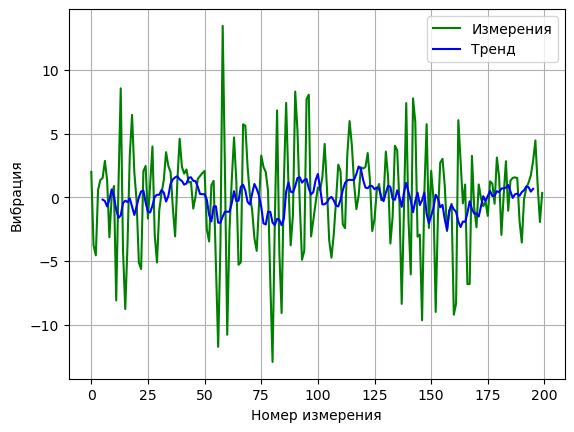

In [ ]:
# Скользящее среднее
trend = data2_part['s1'].rolling(window=10, center=True).mean()

# График
plt.plot(np.arange(len(data2_part['s1'])), data2_part['s1'], color='green', label='Измерения')
plt.plot(np.arange(len(trend)), trend, color='blue', label='Тренд')
plt.xlabel("Номер измерения")
plt.ylabel("Вибрация")
plt.grid(True)
plt.legend()
plt.show()

### Декомпозиция по сезонным трендам с помощью LOESS

Декомпозиция по сезонным трендам с помощью LOESS (STL) - это надежный метод декомпозиции временных рядов, который часто используется в экономическом анализе и анализе окружающей среды. В методе STL используются локально подобранные регрессионные модели для разложения временного ряда на компоненты тренда, сезонности и остатка.

Вы можете применить STL к любому набору данных, но значимые результаты будут получены только в том случае, если в данных есть повторяющаяся временная закономерность (например, качество воздуха ухудшается в теплые месяцы, либо онлайн-шоппинг возрастает в четвертом квартале каждого года). Закономерность отображается в результатах STL как сезонный компонент.

Алгоритм STL сглаживает временные ряды с помощью LOESS в двух циклах; внутренний цикл выполняет итерацию между сезонным сглаживанием и сглаживанием тренда, а внешний цикл минимизирует влияние выбросов. В ходе внутреннего цикла сезонный компонент вычисляется первым и удаляется для вычисления компонента тренда. Остаток вычисляется путем вычитания сезонного и трендового компононентов из временных рядов.

Эти три компонента анализа STL связаны с сырыми временными рядами следующим образом:

$y_i = s_i + t_i + r_i$, где

$y_i$ - значение временного ряда в точке i.

$s_i$ - начение сезонного компонента в точке i.

$t_i$ - значение компонента тренда в точке i.

$r_i$ - значение компонента остатка в точке i.

*Материалы https://doc.arcgis.com/ru/insights/latest/analyze/stl.htm*

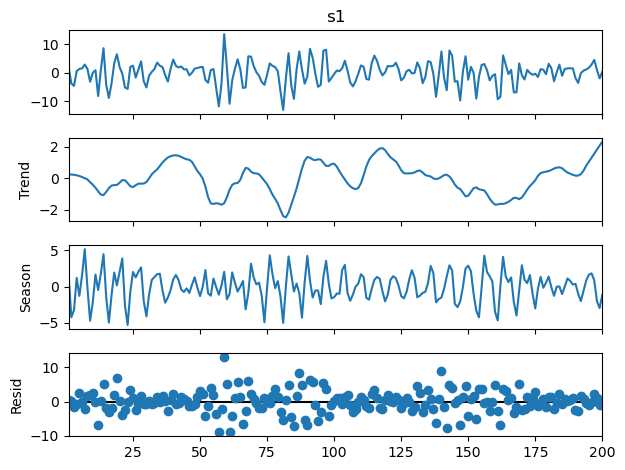

In [ ]:
from statsmodels.tsa.seasonal import STL

# STL разложение
stl_result = STL(data2_part['s1'], period=7).fit()

# График STL разложения
stl_result.plot()
plt.show()